In [2]:
import sqlite3
import pandas as pd

In this exercise, We are implementing the Hospital Information System. In this
exercise, I have created two tables, Hospital and Doctor. You need to create
those two tables on your database server before starting the exercise

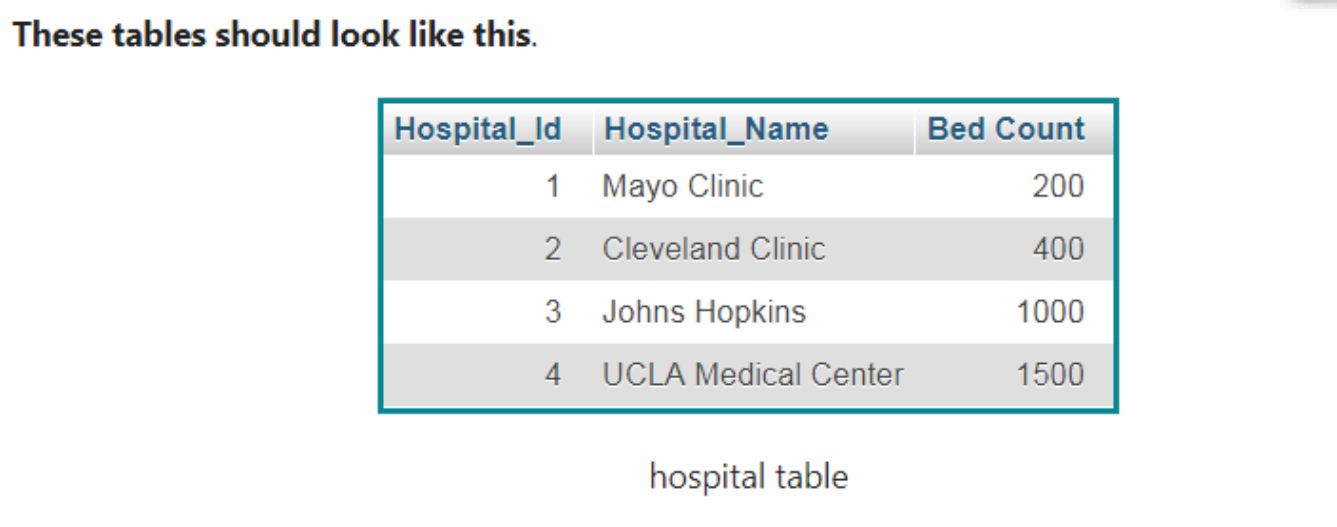

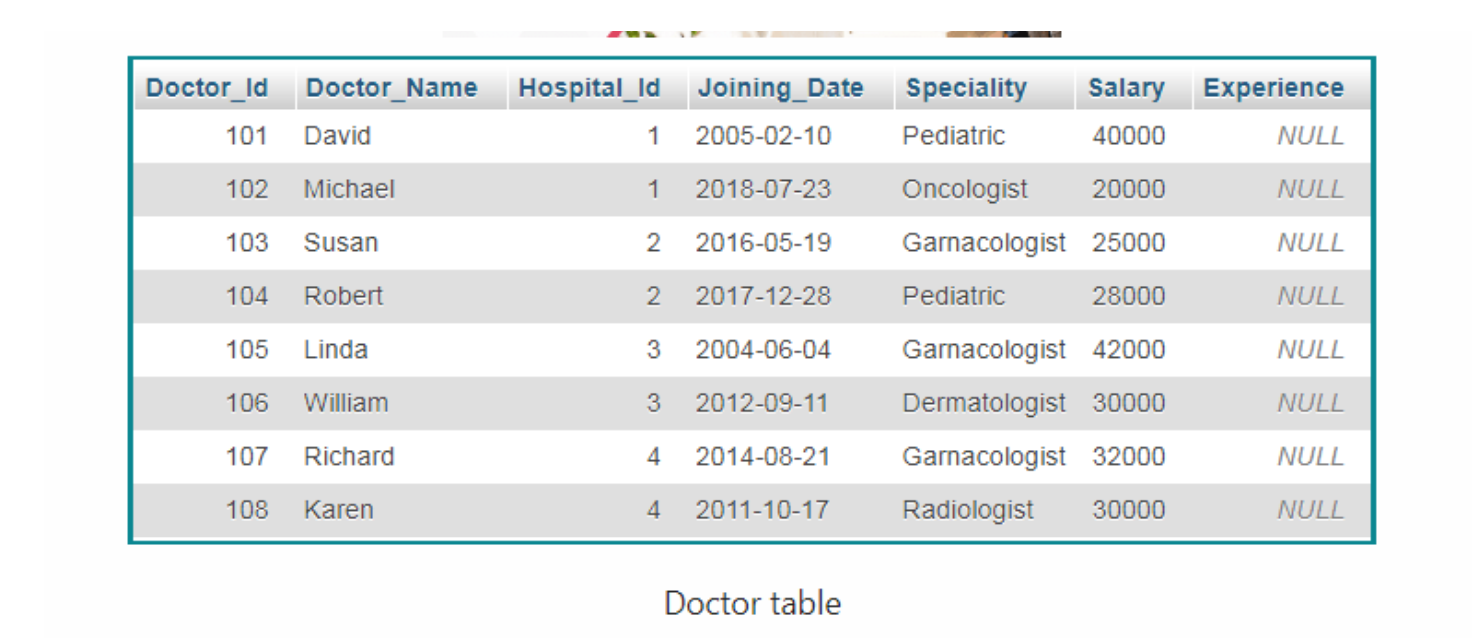

Exercise 1: Connect to your database server and print its
version

In [3]:
con = sqlite3.connect("Hospitalinfo.db")
print("The Sqlite Version is",sqlite3.sqlite_version)
cur = con.cursor()

The Sqlite Version is 3.41.2


Exercise 2: Fetch Hospital and Doctor Information using
hospital Id and doctor Id

In [4]:
hospital_statment='''SELECT ID,Name FROM Hospital'''
cur.execute(hospital_statment)
hospital=cur.fetchall()
hospital_df=pd.DataFrame(hospital,columns=['ID','Name'])
hospital_df.head()


,ID,Name
0,101,Mayo Clinic
1,102,JP Hoplkins
2,103,New Amsterdam
3,104,Clevland Clinic
4,105,Toronto Hopital


In [5]:
doctor_statment='''SELECT DocID,DocName,HospitalID FROM Doctor'''
cur.execute(doctor_statment)
doctor=cur.fetchall()
doctor_df=pd.DataFrame(doctor,columns=['DocID','DocName','HospitalID'])
doctor_df.head()

,DocID,DocName,HospitalID
0,1,Michael,101
1,2,Linda,101
2,3,William,102
3,4,Richard,101
4,5,Karen,103


Exercise 3: Get the list Of doctors as per the given
specialty and salary

In [6]:
doctor_statment='''SELECT DocName,Speciality,salary FROM Doctor'''
cur.execute(doctor_statment)
all_doctors=cur.fetchall()
doctor_df=pd.DataFrame(all_doctors,columns=['DocName','Speciality','salary'])
doctor_df

,DocName,Speciality,salary
0,Michael,Pediatric,900000.0
1,Linda,Gyane,850000.0
2,William,Cardialogist,1000000.0
3,Richard,Pediatric,950000.0
4,Karen,Oncologist,1100000.0
5,Robert,Gyane,940000.0
6,Susan,Oncologist,870000.0
7,Nancy,Cardialogist,870000.0
8,Nick,Cardialogist,770000.0


Exercise 4: Get a list of doctors from a given hospital

In [7]:
statment='''SELECT Doctor.DocID, Doctor.DocName, Doctor.HospitalID, Hospital.Name as HospitalName FROM Doctor JOIN Hospital ON Doctor.HospitalID = Hospital.ID'''
cur.execute(statment)
all_docs=cur.fetchall()
all_doc_pd=pd.DataFrame(all_docs,columns=['DocID',"DocName","HospitalID","HospitalName"])
all_doc_pd

,DocID,DocName,HospitalID,HospitalName
0,1,Michael,101,Mayo Clinic
1,2,Linda,101,Mayo Clinic
2,3,William,102,JP Hoplkins
3,4,Richard,101,Mayo Clinic
4,5,Karen,103,New Amsterdam
5,6,Robert,104,Clevland Clinic
6,7,Susan,105,Toronto Hopital
7,8,Nancy,106,Natura
8,9,Nick,107,Johnson and Johnson


Exercise 5: Update doctor experience in years

In [ ]:
update_statment = '''UPDATE Doctor SET Exp = strftime('%Y','now') - strftime('%Y',JoiningDate)'''
rename_statment='''ALTER TABLE Doctor RENAME COLUMN Exp to ExperienceInYear;'''
cur.execute(update_statment)
cur.execute(rename_statment)
con.commit()

In [14]:
doctor_statment='''SELECT DocName,Speciality,salary,ExperienceInYear,JoiningDate FROM Doctor'''
cur.execute(doctor_statment)
doc_result=cur.fetchall()
doctor_df=pd.DataFrame(doc_result,columns=["DocName","Speciality","salary","ExperienceInYear","JoiningDate"])
doctor_df

,DocName,Speciality,salary,ExperienceInYear,JoiningDate
0,Michael,Pediatric,900000.0,19,2005-02-10
1,Linda,Gyane,850000.0,17,2007-08-08
2,William,Cardialogist,1000000.0,20,2004-09-11
3,Richard,Pediatric,950000.0,13,2011-09-05
4,Karen,Oncologist,1100000.0,4,2020-09-05
5,Robert,Gyane,940000.0,26,1998-09-04
6,Susan,Oncologist,870000.0,30,1994-06-05
7,Nancy,Cardialogist,870000.0,30,1994-06-05
8,Nick,Cardialogist,770000.0,5,2019-06-05
